# ChinaCXRSet

Distribución del dataset:

- 336 casos de pacientes con manifestación de tuberculosis
- 326 casos normales 

Atributos 

- Género
- Edad
- Indica la anormalidad(Sano o Enfermo con Manifestación de Tuberculosis) 


In [1]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [101]:
#Función para graficar los datasets
def graficar_dataset(dataset, tamano_x = 8, tamano_y = 10, columnas = 3, filas = 3, ancho_max_txt=20):
    figure = plt.figure(figsize=(tamano_x, tamano_y))
    cols, rows = columnas, filas
    total_datos = len(dataset.path)
    for i in range(1, cols * rows + 1):
        sample_idx = int(random.random()*total_datos)
        img = mpimg.imread(dataset.iloc[sample_idx].path)
        condicion = dataset.iloc[sample_idx].condition
        len_condicion = len(condicion)
        if len_condicion > ancho_max_txt:

            condicion_list = list(condicion)
            for iterador in range(ancho_max_txt, len_condicion, ancho_max_txt):
                condicion_list[condicion.find(" ", iterador - 5)] = "\n"
            condicion = ''.join(condicion_list)
            print(condicion)
        label = "{} {}\n {}".format(dataset.iloc[sample_idx].genre, int(dataset.iloc[sample_idx].age), condicion)
        figure.add_subplot(rows, cols, i)
        plt.title(label)
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    return plt

## Obtener los nombres de la lista de elementos

In [16]:
direccion_dataset = "/media/josejacomeb/Datos1/DatasetsMédicos/ChinaSet_AllFiles/" #Poner la dirección del dataset aquí
ruta_clinical_readings= os.path.join(direccion_dataset, "ClinicalReadings/")
ruta_cxr_png = os.path.join(direccion_dataset, "CXR_png/")
extension_cxr = "png"
extension_cr = "txt" #Extension Clinical Reading
lista_elementos_dataset = os.listdir(ruta_clinical_readings)
datos = [] #np.zeros((len(lista_elementos_dataset),), dtype=[("path", np.str_), ("genre", np.str_), ("age", "f4"), ("condition", "a10")])

for idx, elemento in enumerate(lista_elementos_dataset):
    nombre_elemento = elemento.split(".")[0]
    ruta_elemento_cxr = os.path.join(ruta_cxr_png, "{}.{}".format(nombre_elemento, extension_cxr))
    ruta_elemento_cr = os.path.join(ruta_clinical_readings, "{}.{}".format(nombre_elemento, extension_cr))
    with open(ruta_elemento_cr, 'r') as archivo_texto:
        datos_archivo_texto = archivo_texto.read() #Obtengo la informacion del dataset
        datos_archivo_texto = datos_archivo_texto.rstrip() #Eliminar tabulación final
        datos_archivo_texto.replace("\t", "")
        atributos_archivo = datos_archivo_texto.split('\n') #Separar por enters
        condicion_paciente = atributos_archivo[-1] #Ultimo elemento
        genero = ""
        edad = 0
        if "," in atributos_archivo[0]:
            genero_edad = atributos_archivo[0].rstrip().lstrip().split(",")
        
        else:
            genero_edad = atributos_archivo[0].rstrip().split(" ")
            #Verificar si el genero y la edad estan unidos
            if len(genero_edad) == 1:
                if genero_edad[0].find('female') == 0:
                    genero_edad.append(genero_edad[0].lstrip("female"))
                    genero_edad[0] = "female"
                elif genero_edad[0].find('male') == 0:
                    genero_edad.append(genero_edad[0].lstrip("male"))
                    genero_edad[0] = "male"
        #Eliminar los caracteres vacios
        genero_edad = [valido for valido in genero_edad if valido]

        genero, edad = genero_edad[0:2]

        if "yrs" in edad: #Convertir a int
            edad = edad.rstrip("yrs")
        elif "yr" in edad: #Convertir a int
            edad = edad.rstrip("yr")
        elif "month" in edad: #Convertir a int
            edad = edad.rstrip("month")
            edad = float(edad)/12.0
        elif "days" in edad: #Convertir a int
            edad = edad.rstrip("days")
            edad = float(edad)/365.0
        
        genero = genero.rstrip().lstrip().lower()
        if genero.find("fem")==0:
            genero = 'female'
        edad = float(edad)
    ruta_elemento_clinical_reading = os.path.join(ruta_clinical_readings)
    datos.append({"path":ruta_elemento_cxr, "genre": genero, "age": edad,  "condition": condicion_paciente})
panda_datos = pd.DataFrame(datos) #Convertir a formato Pandas


## Visualizar todos los datos

Len 32
PTB in the bilateral
upper field
Len 27
PTB in the left
lower field
Len 28
PTB in the right
upper field
Len 33
PTB in the bilateral
upper fields


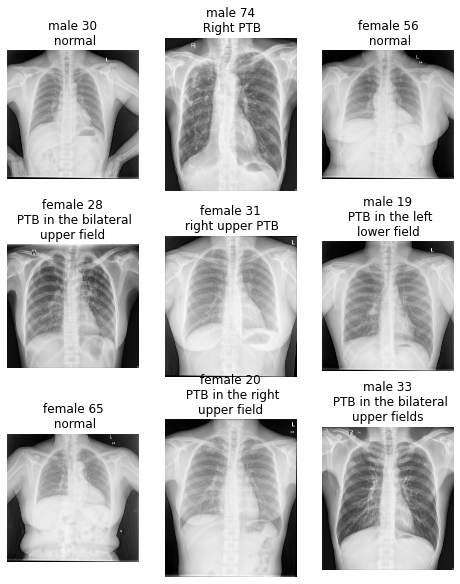

In [102]:
plt = graficar_dataset(panda_datos)
plt.show()

In [8]:
panda_datos.describe()

,age
count,662.000000
mean,35.434807
std,14.812315
min,0.175342
25%,26.000000
50%,33.000000
75%,43.000000
max,89.000000


In [4]:
panda_datos.head()

,path,genre,age,condition
0,/media/josejacomeb/Datos1/DatasetsMédicos/Chin...,female,62.0,normal
1,/media/josejacomeb/Datos1/DatasetsMédicos/Chin...,male,45.0,normal
2,/media/josejacomeb/Datos1/DatasetsMédicos/Chin...,male,63.0,normal
3,/media/josejacomeb/Datos1/DatasetsMédicos/Chin...,female,48.0,normal
4,/media/josejacomeb/Datos1/DatasetsMédicos/Chin...,male,58.0,normal


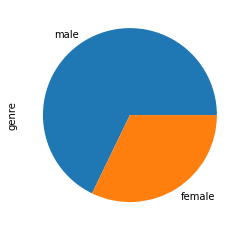

In [31]:
valores_genero = panda_datos["genre"].value_counts()
valores_genero = valores_genero.plot.pie()

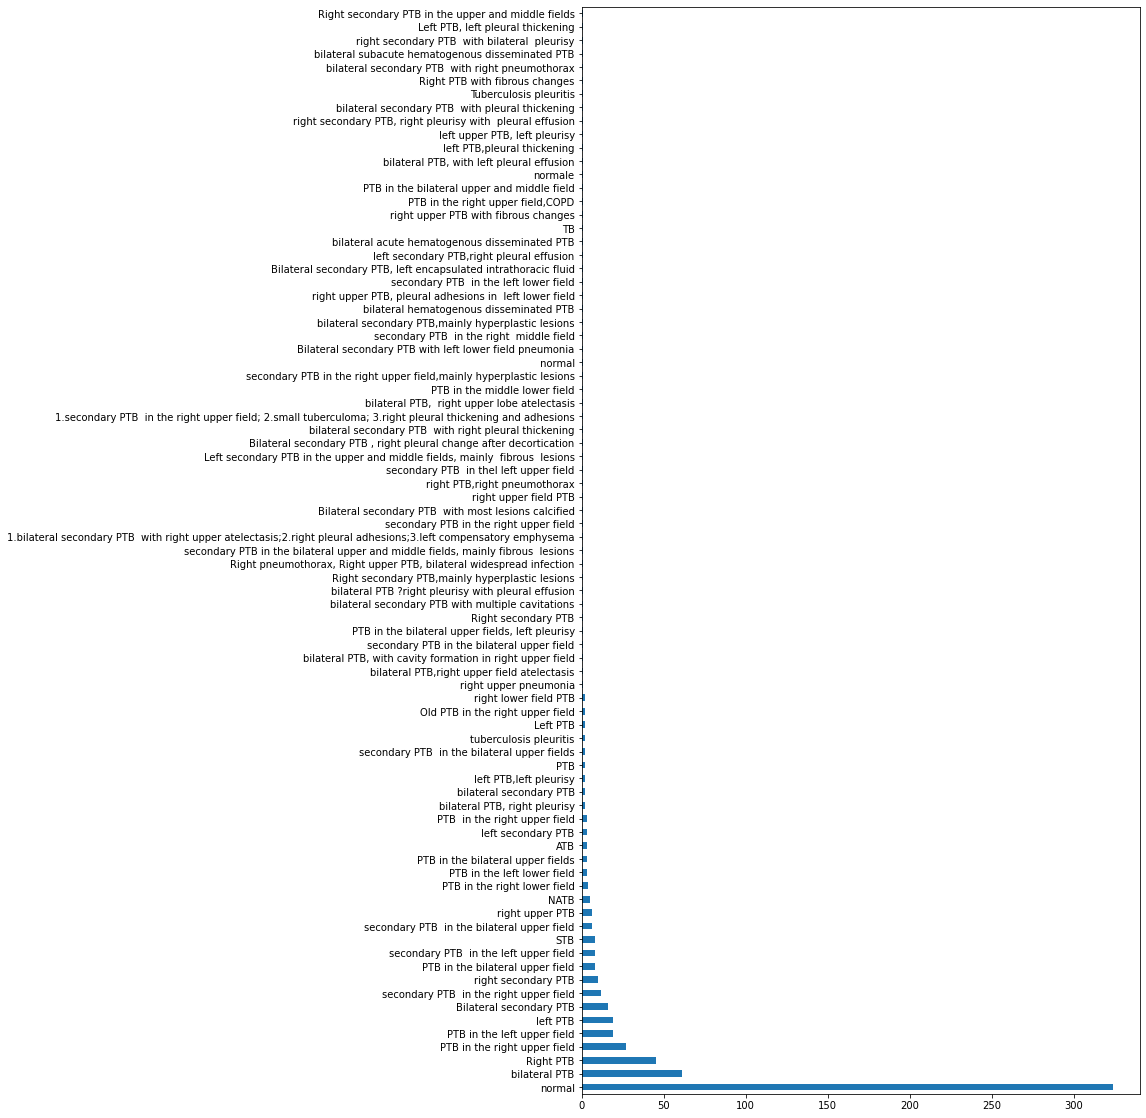

In [35]:
series_condition = panda_datos["condition"].value_counts()
matplot_condicion = series_condition.plot.barh(figsize=(10,20))

## Filtrar los datos

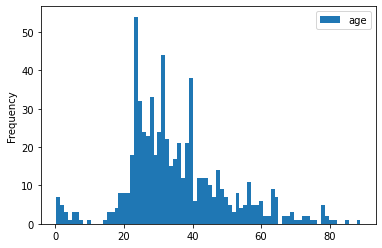

In [28]:

ax = panda_datos.plot.hist("age", panda_datos["age"].value_counts().count())

### Filtrar por Edad
### Jóvenes


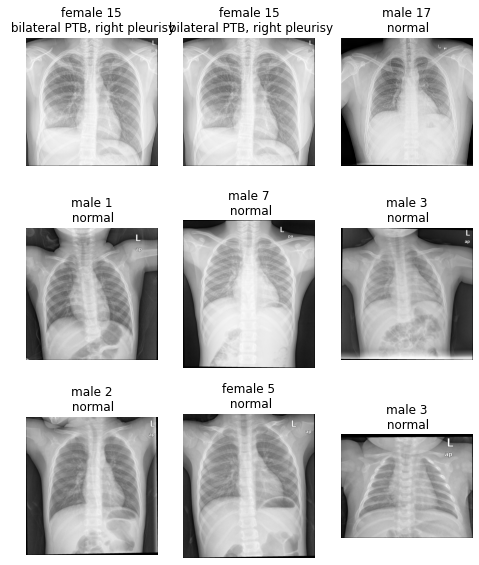

In [72]:
dataset_jovenes = panda_datos[panda_datos["age"] < 18.0]
plt = graficar_dataset(dataset_jovenes)
plt.show()


### Adultos 

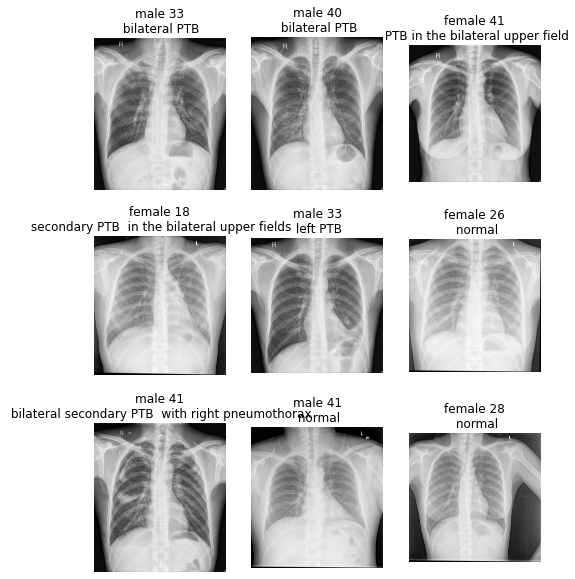

In [73]:
dataset_adultos = panda_datos[(panda_datos["age"] >= 18.0) & (panda_datos["age"] < 60.0)]
plt = graficar_dataset(dataset_adultos)
plt.show()

### Adultos Mayores

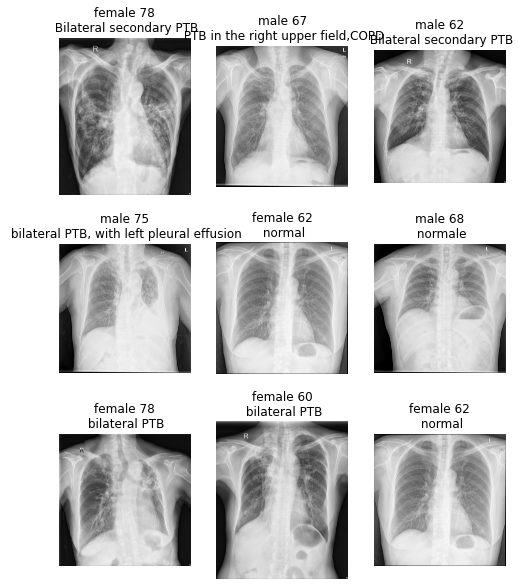

In [74]:
dataset_adultos_mayores = panda_datos[(panda_datos["age"] >= 60.0)]
plt = graficar_dataset(dataset_adultos_mayores)
plt.show()

### Filtrar por Condición
### Normal

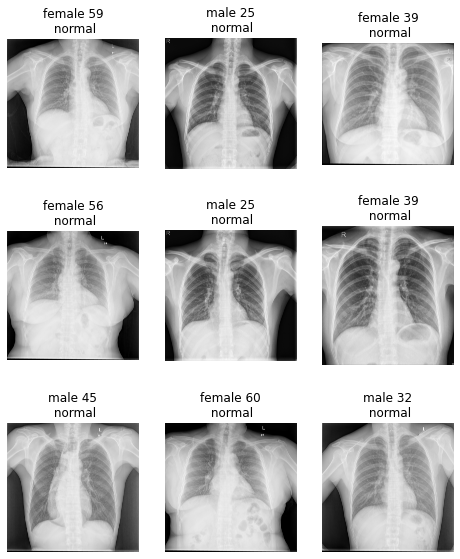

In [67]:
dataset_normal = panda_datos[panda_datos.condition == "normal"]
plt = graficar_dataset(dataset_normal)
plt.show()

### Con enfermedad

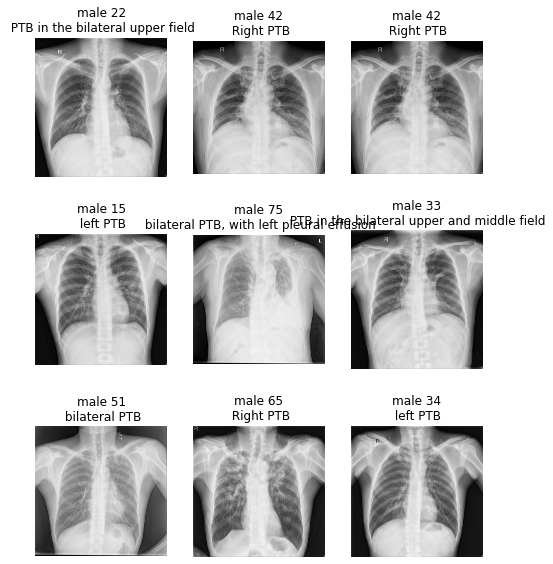

In [69]:
dataset_enfermedad = panda_datos[panda_datos.condition != "normal"]
plt = graficar_dataset(dataset_enfermedad)
plt.show()